# Lista 1

In [68]:
import sys
sys.path.append('..')

from IPython.display import display
import numpy as np
import pandas as pd
from scipy.special import factorial, comb
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from utils.math import gaussian

## Questão 1

# Questão 2

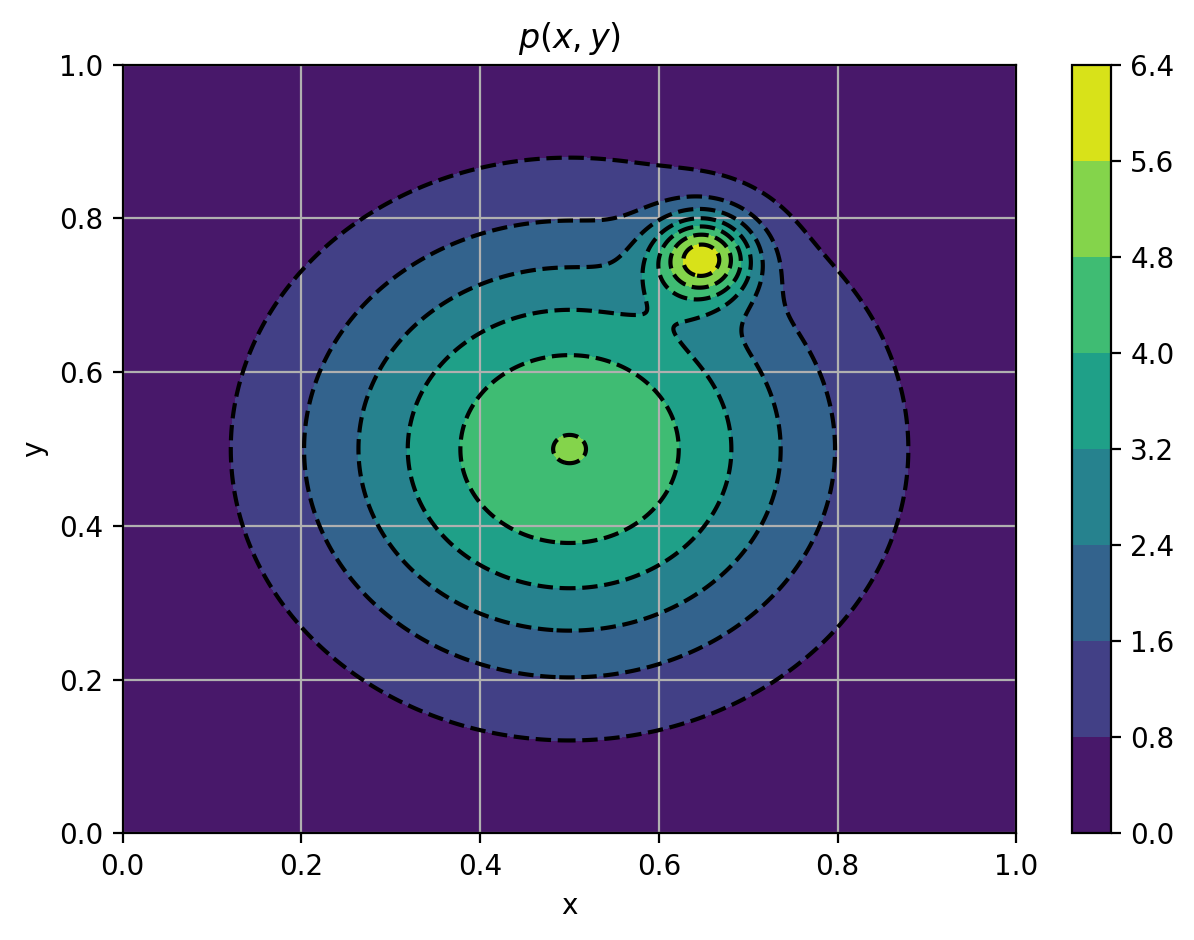

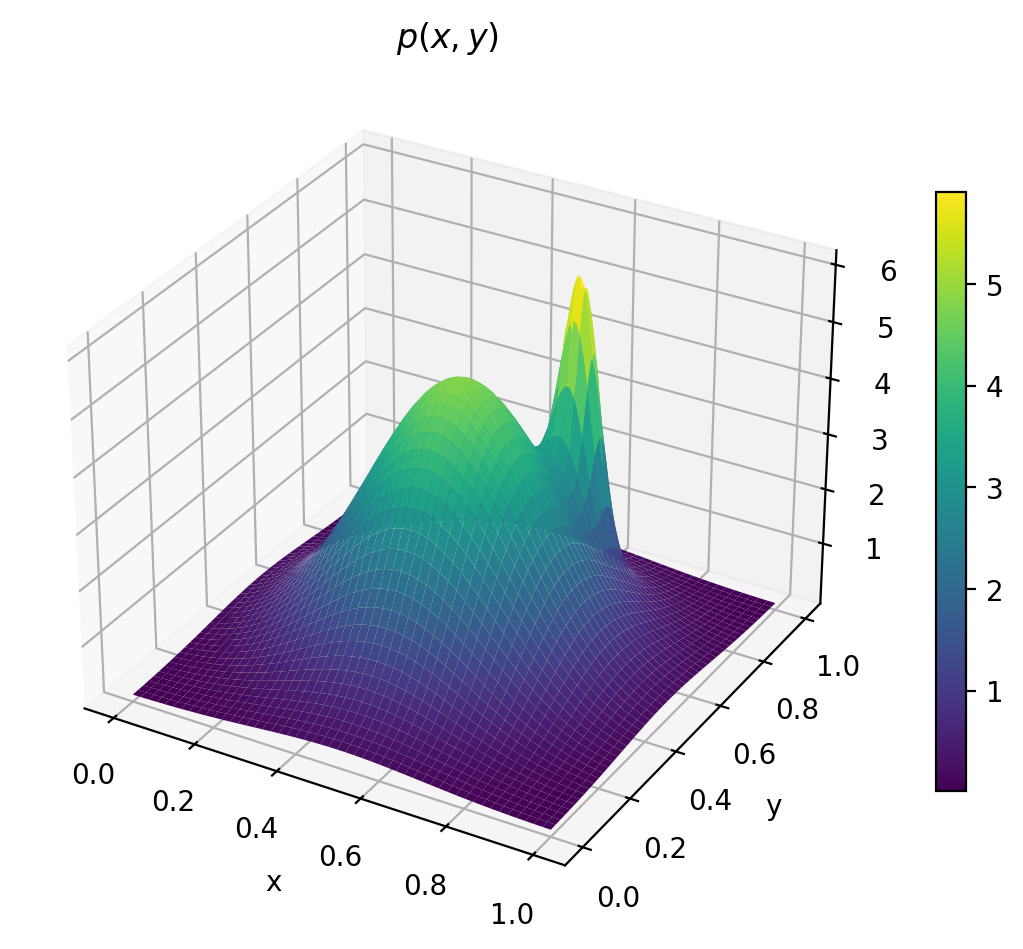

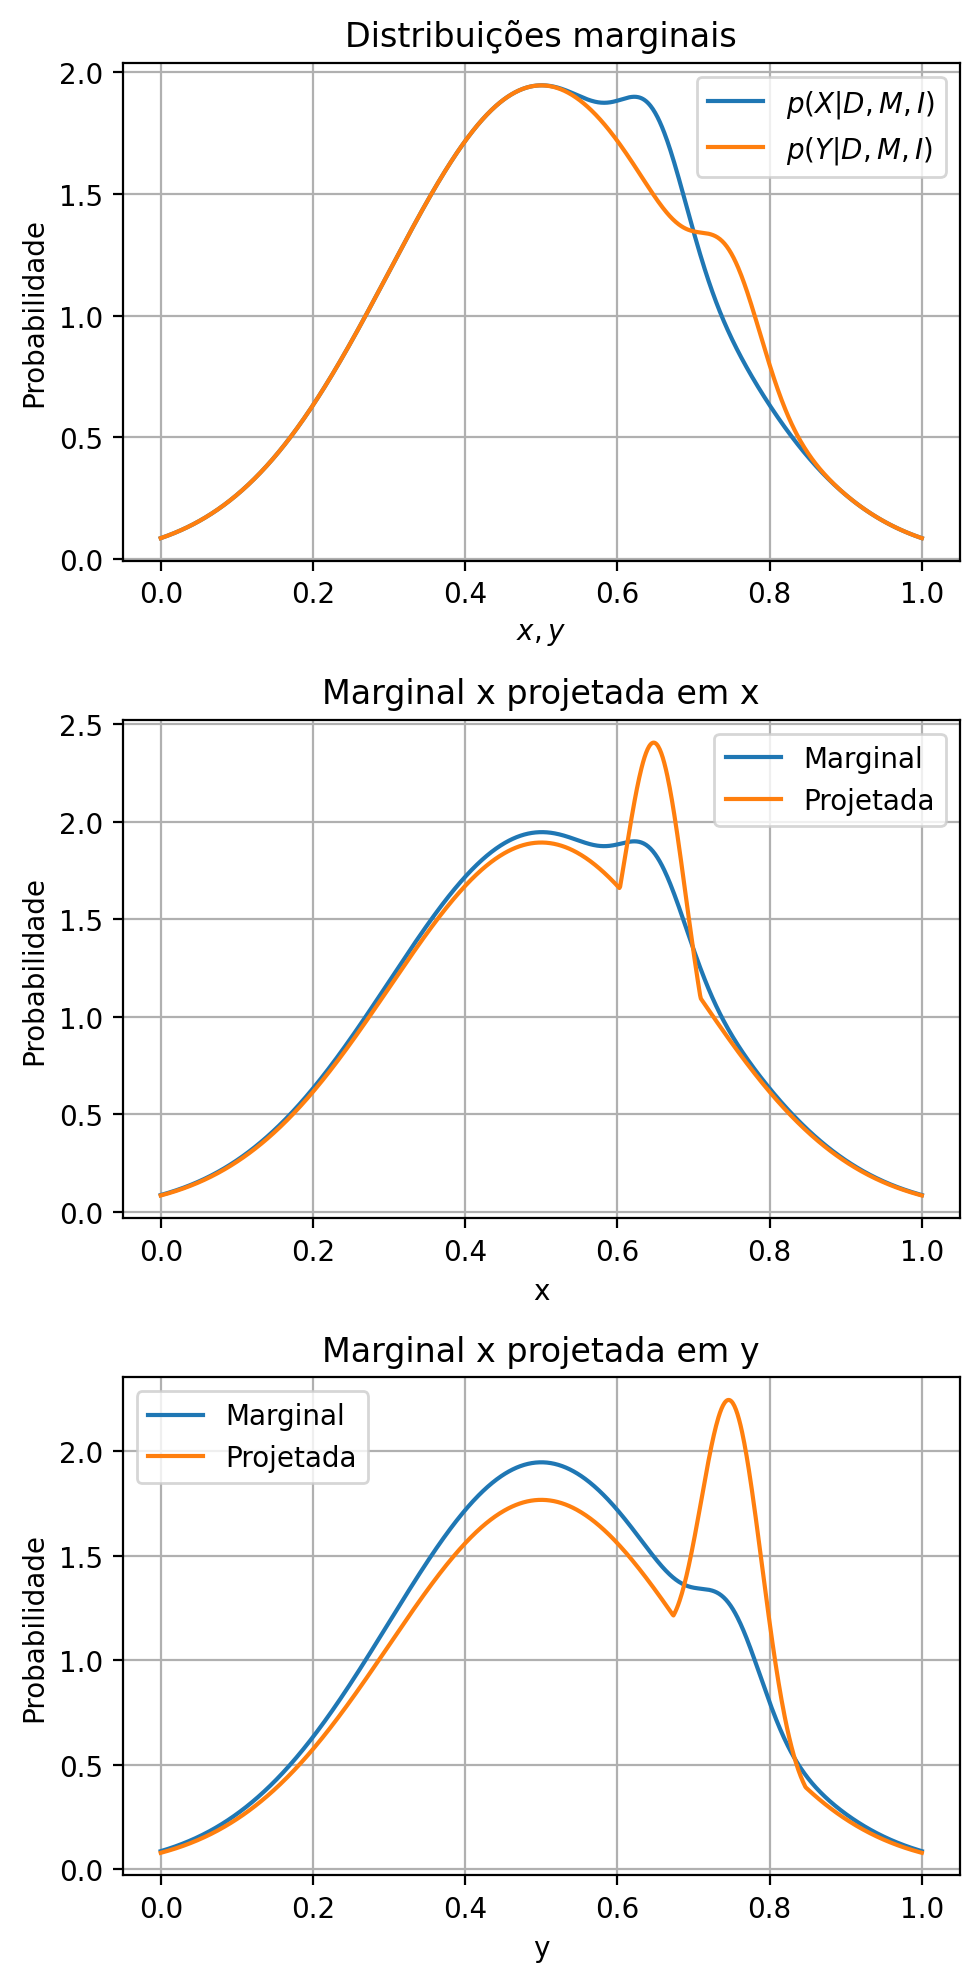

In [120]:
a1 = 4.82033
a2 = 4.43181
x1 = 0.5
y1 = 0.5
x2 = 0.65
y2 = 0.75
sigma1squared = 0.2 ** 2
sigma2squared = 0.04 ** 2

def p(x, y):
    arg1 = (x - x1) ** 2 + (y - y1) ** 2
    arg2 = (x - x2) ** 2 + (y - y2) ** 2
    return a1 * np.exp(-0.5 * arg1 / sigma1squared) + a2 * np.exp(-0.5 * arg2 / sigma2squared)

npoints = 1000
x = np.linspace(0, 1., npoints)
y = np.linspace(0, 1, npoints)
xx, yy = np.meshgrid(x, y)
zz = p(xx, yy)

# Contour plot
fig, ctrax = plt.subplots()
cs = ctrax.contourf(xx, yy, zz, cmap=plt.cm.viridis)
ctrax.contour(cs, colors='k', linestyles='dashed')
fig.colorbar(cs, ax=ctrax)
ctrax.set_title(r'$p(x,y)$')
ctrax.set_xlabel('x')
ctrax.set_ylabel('y')
ctrax.grid()
fig.tight_layout()

# Surface 3D plot
fig = plt.figure()
srfax = fig.add_subplot(projection='3d')
surf = srfax.plot_surface(xx, yy, zz, cmap=plt.cm.viridis)
fig.colorbar(surf, shrink=0.7)
srfax.set_xlabel('x')
srfax.set_ylabel('y')
srfax.set_title(r'$p(x,y)$')
fig.tight_layout()

# Marginal distributions
fig, axs = plt.subplots(3, 1, figsize=(5, 10))
xmarg = np.trapz(zz, y, axis=0)
xmarg /= np.trapz(xmarg, x)
xproj = np.max(zz, axis=0)
xproj /= np.trapz(xproj, x)
ymarg = np.trapz(zz, x, axis=-1)
ymarg /= np.trapz(ymarg, y)
yproj = np.max(zz, axis=-1)
yproj /= np.trapz(yproj, y)
axmarg, xaxproj, yaxproj = axs
axmarg.plot(x, xmarg, label=r'$p(X|D,M,I)$')
axmarg.plot(y, ymarg, label=r'$p(Y|D,M,I)$')
axmarg.set_xlabel(r'$x, y$')
axmarg.set_title('Distribuições marginais')
xaxproj.plot(x, xmarg, label="Marginal")
xaxproj.plot(x, xproj, label="Projetada")
xaxproj.set_xlabel('x')
xaxproj.set_title('Marginal x projetada em x')
yaxproj.plot(y, ymarg, label="Marginal")
yaxproj.plot(y, yproj, label="Projetada")
yaxproj.set_xlabel('y')
yaxproj.set_title('Marginal x projetada em y')
for ax in axs:
    ax.grid()
    ax.legend()
    ax.set_ylabel('Probabilidade')
fig.tight_layout()

plt.show()

## Questão 3

Primeiramente, vamos arbitrar que existem $N$ jogadores em campo nessa partida de futebol, e que eles podem fazer aniversário em $M$ dias do ano. Ao final, faremos os cálculos para o caso realista $(N,M) = (22, 365)$.

Atribuímos números de 1 a $N$ para cada jogador (não necessariamente os mesmos de suas camisas). Definimos a proposição $$E_i = \{\text{dos primeiros $i$ jogadores, nenhum faz aniversário na mesma data}\}.$$

Definimos $\mathbb{P}(E_1) = 1$, e notamos que $E_i \subset E_j$ se $i<j$. Em seguida, desenvolvemos

$$
\mathbb{P}(E_1, \ldots, E_n) = \mathbb{P}(E_n | E_1, \ldots, E_{n-1}) \mathbb{P}(E_1, \ldots, E_{n-1})
$$

A probabilidade condicional $\mathbb{P}(E_n | E_{n-1}, \ldots, E_1)$ depende do jogador $n$ não fazer aniversário nas mesmas datas dos demais, dado que nenhuma destas coincide. Dessa maneira, assumindo uma probabilidade uniforme, o jogador $n$ tem exatamente $M - (n-1)$ datas possíveis. Portanto,

$$
\mathbb{P}(E_n | E_{n-1}, \ldots, E_1) = \frac{M - n + 1}{M}
$$

Obtém-se a relação de recorrência

\begin{align*}
\mathbb{P}(E_1, \ldots, E_n) = \frac{M - n + 1}{M} \mathbb{P}(E_1, \ldots, E_{n-1}),
\end{align*}

cuja solução é dada pelo produto

\begin{align*}
    \mathbb{P}(E_1, \ldots, E_n) &= \prod_{i=1}^n \frac{M - i + 1}{M}\\
    &= \frac{1}{M^n} \frac{M!}{(M-n)!}\\
    &= \frac{n!}{M^n} \binom{M}{n}
\end{align*}

Finalmente, a probabilidade de que ao menos dois jogadores tenham o mesmo aniversário é dada por $$\mathbb{P}(\overline{E_1, \ldots, E_n}) = 1 - \frac{n!}{M^n} \binom{M}{n}$$

Vamos visualizar essa probabilidade nas células abaixo.

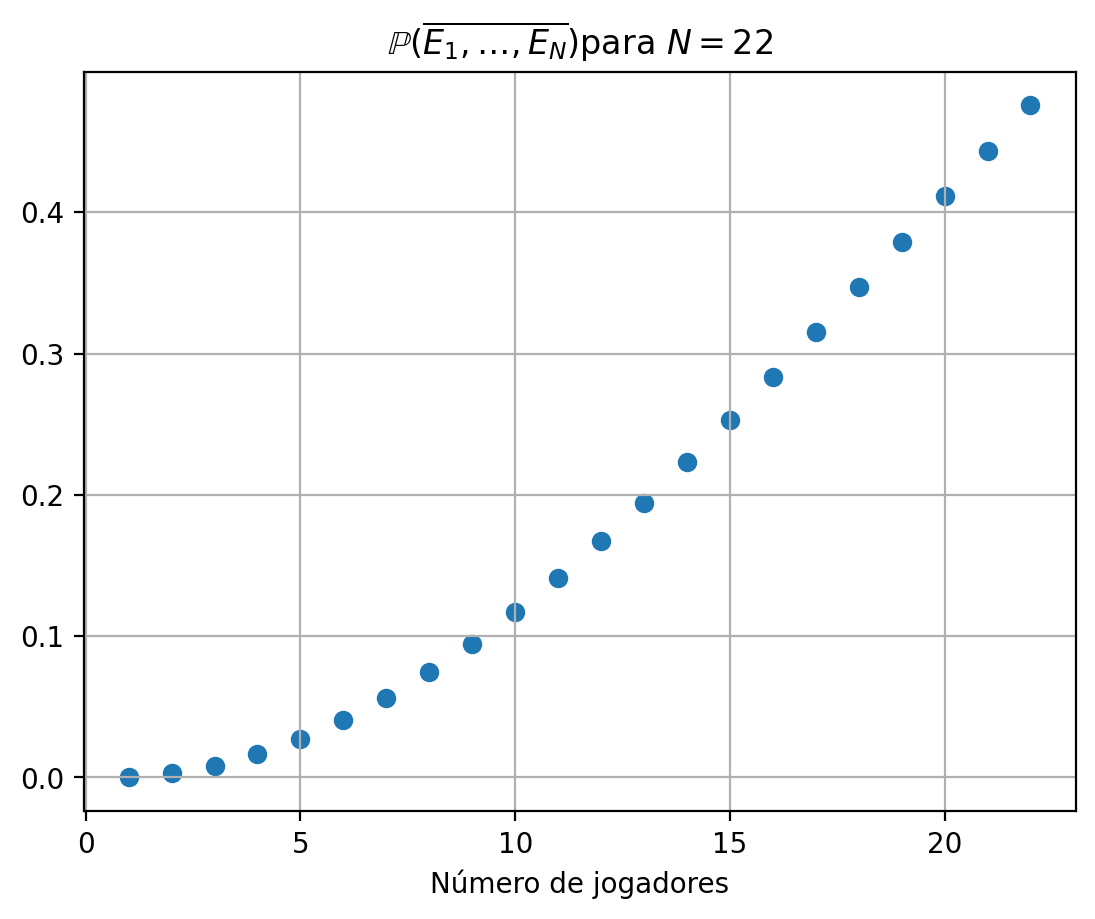

,Probabilidade
1,0.00
2,0.00
3,0.01
4,0.02
5,0.03
6,0.04
7,0.06
8,0.07
9,0.09
10,0.12


In [70]:
def same_birthday_prob(n, m):
    return 1 - factorial(n) * comb(m, n, exact=True) / m ** n

M = 365
N = 22
narr = np.arange(1, 23, dtype=np.int32)
probarr = np.array([same_birthday_prob(i, M) for i in range(1, N + 1)])

# Plot probabilities over n
plt.scatter(narr, probarr)
plt.xlabel('Número de jogadores')
plt.title(r'$\mathbb{P}(\overline{E_1, \ldots, E_N})$' + r'para $N={}$'.format(N))
plt.grid()
plt.show()

# Print probabilities as a table
prob_df = pd.DataFrame(data=probarr, index=narr, columns=["Probabilidade"])
pd.options.display.float_format = '{:.2f}'.format
display(prob_df)

Assim, observamos que deve-se expulsar ao menos 8 jogadores para que a probabilidade com que ao menos dois em campo tenham a mesma data de aniversário caia para 25%.

## Questão 4

Seja $D_i$ o resultado após jogar o dado $i$. Nós vamos nos valer da hipótese de que cada lançamento dos dados é independente dos demais.

### a)

\begin{align*}
\mathbb{P}(D_1 \leq 3, D_2=5) &= \mathbb{P}(D_1 \leq 3)\mathbb{P}(D_2=5)\\
&= \frac{1}{2} \cdot \frac{1}{6}\\
&= \frac{1}{12}
\end{align*}

### b)

\begin{align*}
\mathbb{P}(D_1 + D_2 + D_3 = 16) &= \sum_{i=1}^{6} \mathbb{P}(D_1=i | D_2 + D_3 = 16 - i)\mathbb{P}(D_2 + D_3 = 16 - i)\\
&= \sum_{i=1}^{6} \sum_{i=j}^{6} \mathbb{P}(D_1=i | D_2 + D_3 = 16 - i)\mathbb{P}(D_2 = j | D_3 = 16 - i - j)\mathbb{P}(D_3 16 - i - j)\\
&= \sum_{i=1}^{6} \sum_{i=j}^{6} \mathbb{P}(D_1=i)\mathbb{P}(D_2 = j)\mathbb{P}(D_3 = 16 - i - j),
\end{align*}

Notamos também que esse desenvolvemento pode ser generalizado para outros valores da soma dos dados além de 16.

In [71]:
def dice_prob(val, n):
    if val < 1 or val > n:
        return 0.
    return 1. / n

def two_die_sum(total, n):
    prob = 0
    for i in range(1, n + 1):
        prob += dice_prob(i, n) * dice_prob(total - i, n)
    return prob

def three_die_sum(total, n):
    prob = 0
    for i in range(1, n + 1):
        prob += dice_prob(i, n) * two_die_sum(total - i, n)
    return prob

ndice = 6
total_arr = np.arange(1, 3 * ndice + 1)
two_die_sum_arr = [two_die_sum(i, ndice) for i in total_arr]
three_die_sum_arr = [three_die_sum(i, ndice) for i in total_arr]

data = np.stack((two_die_sum_arr, three_die_sum_arr), axis=-1)
total_sum_prob = np.sum(data, axis=0)
die_pd = pd.DataFrame(data, index=total_arr, columns=['Soma de dois dados', 'soma de três dados'])
display(die_pd)
print(f"Soma das probabilidades: 2 dados: p = {total_sum_prob[0]:.1f}, 3 dados: p = {total_sum_prob[1]:.1f}")

,Soma de dois dados,soma de três dados
1,0.00,0.00
2,0.03,0.00
3,0.06,0.00
4,0.08,0.01
5,0.11,0.03
6,0.14,0.05
7,0.17,0.07
8,0.14,0.10
9,0.11,0.12
10,0.08,0.12


Soma das probabilidades: 2 dados: p = 1.0, 3 dados: p = 1.0
